In [1]:
from netCDF4 import Dataset
from boutdata import collect
import glob
from matplotlib import pyplot as plt

In [56]:
path = "/home/alec/sophia_data/tcv/76142/run/1e21"
field_list = ['n']
probe_list = ['3']

In [54]:
probe_data = {}
for p in probe_list:
    probe_data[p] = {}

    probe_vars = [f"{f}{p}" for f in field_list]
    probe_vars.append('t_array')
    for var in probe_vars:
        for file in glob.glob(f'{path}/BOUT.fast.*'):
            try:
                with Dataset(file) as f:
                    probe_data[p][var] = f[var][:]
                    print(f"data {var} loaded from {file.split('/')[-1]}")
                    break
            except:
                continue

data n3 loaded from BOUT.fast.32.nc
data t_array loaded from BOUT.fast.0.nc


In [61]:
nx, nz = collect('nx', path=path), collect('nz', path=path)

probe_pos = {}
for p in probe_list:
    probe_pos[p] = {}
    frac = 0.1*(int(p)+2)
    probe_pos[p]['x'] = round(frac*int(nx))
    probe_pos[p]['z'] = round(0.5*int(nz))

In [73]:
sim_data = {}
sim_data['t_array'] = collect('t_array', path = path)
for f in field_list:
    sim_data[f] = collect(f, path = path)

mxsub = 8 mysub = 1 mz = 512

nxpe = 64, nype = 1, npe = 64

mxsub = 8 mysub = 1 mz = 512

nxpe = 64, nype = 1, npe = 64

Reading from /home/alec/sophia_data/tcv/76142/run/1e21/BOUT.dmp.63.nc: [1-9][0-0] -> [505-513][0-0]


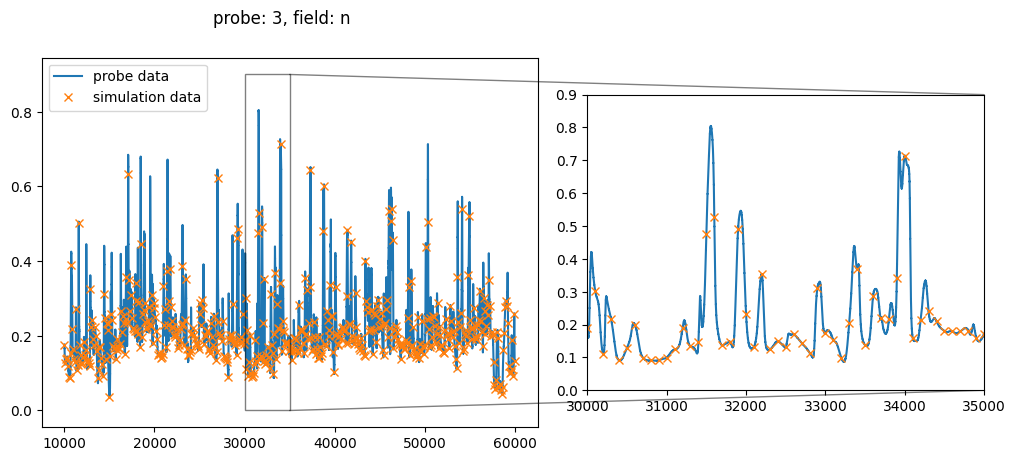

In [95]:
zoom_t_start = 30000 
zoom_t_end = 35000
zoom_y_min = 0.0
zoom_y_max = 0.9

for p in probe_list:
    for f in field_list:
        fig, ax = plt.subplots()
    
        ax.plot(probe_data[p]['t_array'], probe_data[p][f"{f}{p}"], label = 'probe data')
        ax.plot(sim_data['t_array'], sim_data[f][:, probe_pos[p]['x'], 0, probe_pos[p]['z']], "x", label = 'simulation data')
        ax.legend(loc="upper left")
    
        ax_inset = ax.inset_axes([1.1, 0.1, 0.8, 0.8])
    
        ax_inset.plot(probe_data[p]['t_array'], probe_data[p][f"{f}{p}"], label = 'probe data')
        ax_inset.plot(sim_data['t_array'], sim_data[f][:, probe_pos[p]['x'], 0, probe_pos[p]['z']], "x", label = 'simulation data')
    
        ax_inset.set_xlim(zoom_t_start, zoom_t_end)
        ax_inset.set_ylim(zoom_y_min, zoom_y_max)
        
        ax.indicate_inset_zoom(ax_inset, edgecolor="black")
    
        fig.suptitle(f"probe: {p}, field: {f}")